# Questão número 3 da prova
Controle 2 2020/2

Aluno: Jhonatan de Freitas Lang


In [1]:
pip install control

In [2]:
import numpy as np
import sympy as sp
import control                   
import control.matlab
import math
import cmath
import matplotlib.pyplot as plt
from scipy import linalg

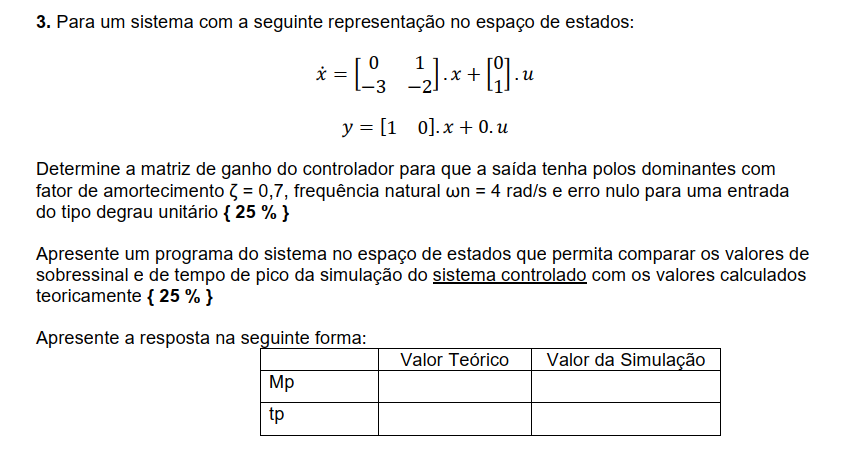

In [3]:
# Declaração de variáveis

tfinal = 1e-3;

# Matrizes de estados cálculadas 

A = np.block([[ 0 , 1 ],[ -3 , -2 ]])
B = np.block([[ 0 ],[ 1 ]])
C = np.block([[1, 0]])
D = 0;

#conversão para função de transferência

# sistema no espaço de estados
sys = control.ss(A,B,C,D);

# convertendo para função de tranferência com a utilização da função ss2tf
G = control.ss2tf(sys);
[[n]],[[d]] = control.tfdata(G);

G

TransferFunction(array([1.]), array([1., 2., 3.]))

In [4]:
# Verificando polos da planta
autovalores_planta, autovetores = linalg.eig(A);
polos_planta = autovalores_planta
polos_planta

array([-1.+1.41421356j, -1.-1.41421356j])

In [5]:
# Matriz de Controlabilidade
Mc = control.ctrb(A,B)
Mc

# Teste de Controlabilidade
rank_Mc = np.linalg.matrix_rank(Mc) #número de postos do sistema
if len(Mc) == rank_Mc:          
    display("A matriz é completamente controlavel")

'A matriz é completamente controlavel'

In [6]:
# cálculo dos novos parâmetros de frequência e fator de amortecimento
zeta = 0.7
wn = 4

wd = wn*math.sqrt(1-(zeta**2))

# Polos dominantes desejados
s1 = -zeta*wn + 1j*wd
s2 = -zeta*wn - 1j*wd
s3 = -10*abs(s1);


print(zeta)
print(wd)
print(wn)
print(s1)
print(s2)
print(s3)

0.7
2.85657137141714
4
(-2.8+2.85657137141714j)
(-2.8-2.85657137141714j)
-39.99999999999999


In [7]:
Mp = np.exp((-np.pi*zeta)/np.sqrt(1-zeta**2))

Ts5=3/(zeta*wn)
Ts = Ts5/10
Fs = 1/Ts

print(Mp*100)
print(Ts5)

4.598791026026775
1.0714285714285714


In [8]:
# Equação característica desejada
eq_des = np.poly([s1, s2, s3]);
eq_des

# Matrizes Expandidas
A_controle = np.block([[A, np.zeros([2,1])],[-C, 0]]);
B_controle = np.block([[B],[0]]);

# Matriz de ganhos do controlador K_chapeu = [k1 k2 -ki]
K_controle = control.acker(A_controle,B_controle,[s1, s2, s3])
K_controle

K = np.block([K_controle[0,0], K_controle[0,1] ])
Ki = -K_controle[0,2]
AA = np.block([[A-B*K, B*Ki],[-C,0]])
BB = np.block([[0],[0],[1]])
CC = np.block([1, 0, 0])
DD = 0;

ctrld_sys = control.ss(AA,BB,CC,DD);

print(Ki)
print(K_controle[0,0])
print(K_controle[0,1])


639.9999999999999
236.99999999999994
43.599999999999994


## Simulação

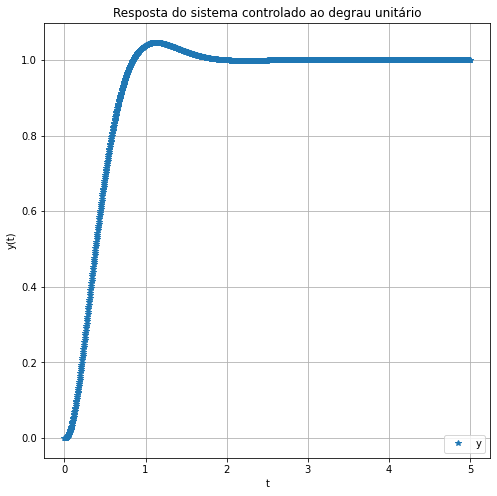

In [9]:
# resposta para entrada ao degrau do sistema controlado
tfinal = 5
Y_ctrld, t_y_ctrld = control.matlab.step(ctrld_sys,tfinal);

fig, ((ax1) ) = plt.subplots(1, 1)
fig.set_size_inches(8,8)

ax1.plot(t_y_ctrld,Y_ctrld,'*')
ax1.set_title("Resposta do sistema controlado ao degrau unitário")
ax1.set_xlabel("t")
ax1.set_ylabel("y(t)")
ax1.legend(['y'],loc="lower right")
ax1.grid(True,'both')

In [14]:

# Sobressinal percentual
Mp_med = (max(Y_ctrld)-Y_ctrld[-1])/(Y_ctrld[-1]-Y_ctrld[0]);
print("\nMp medido = "+ str(Mp_med*100) + " %")

# Tempo de acomodação para 5%

j = 0;
delta = Y_ctrld[0];
while (delta < max(Y_ctrld)):
    tp = t_y_ctrld[j];
    j = j+1;
    delta=Y_ctrld[j+1]
    
print("\n\n Tp medido = \n",tp)

tp_calc = np.pi/wd
print("\n\n Tp cálculado = \n",tp_calc)


Mp medido = 4.5736651784029885 %


 Tp medido = 
 1.1187845303867403


 Tp cálculado = 
 1.0997774062376235


|     	|  Mp (%)  	| tp (s) 	|
|:----:	|:-----:	|:-----:	|
|  Cálculado  	| 4.598791026026775	|   1.0997774062376235  	| 
|  Medido  	| 4.5736651784029885 	|    1.1187845303867403	| 


A pequena diferença pode estar associada ao per~iodo de amostragem da função step